In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CyRK import __version__, cyrk_ode, nbrk_ode

from lotkavolterra import (
    lotkavolterra_cy, lotkavolterra_nb, lotkavolterra_args, lotkavolterra_y0,
    lotkavolterra_time_span_1, lotkavolterra_time_span_2)

from pendulum import pendulum_cy, pendulum_nb, pendulum_args, pendulum_y0, pendulum_time_span_1, pendulum_time_span_2

from lorenz import lorenz_cy, lorenz_nb, lorenz_args, lorenz_y0, lorenz_time_span_1, lorenz_time_span_2

diffeqs = {
    'Lotkavolterra': (lotkavolterra_cy, lotkavolterra_nb, lotkavolterra_args, lotkavolterra_y0,
                      (lotkavolterra_time_span_1, lotkavolterra_time_span_2)),
    'Pendulum'     : (
    pendulum_cy, pendulum_nb, pendulum_args, pendulum_y0, (pendulum_time_span_1, pendulum_time_span_2)),
    'Lorenz'       : (lorenz_cy, lorenz_nb, lorenz_args, lorenz_y0, (lorenz_time_span_1, lorenz_time_span_2))
    }

## CyRK - cyrk_ode

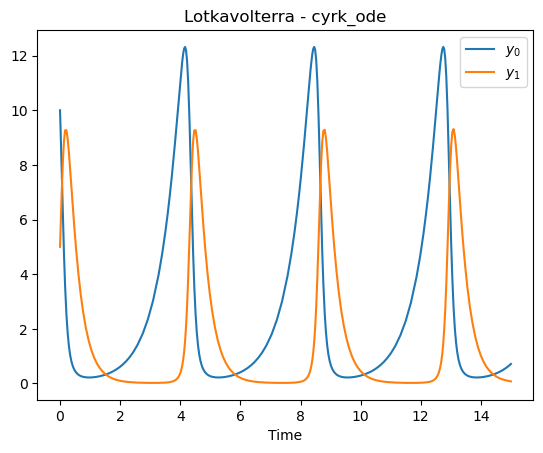

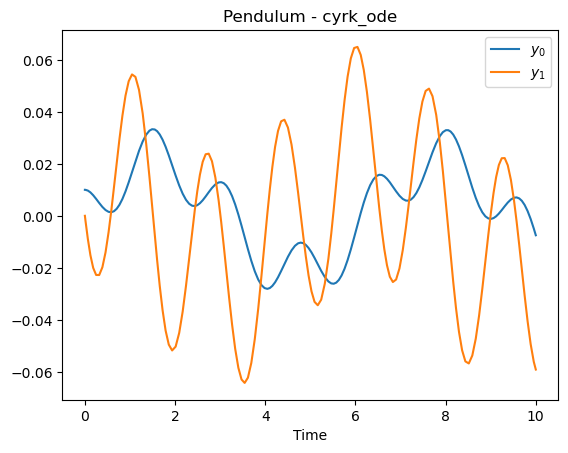

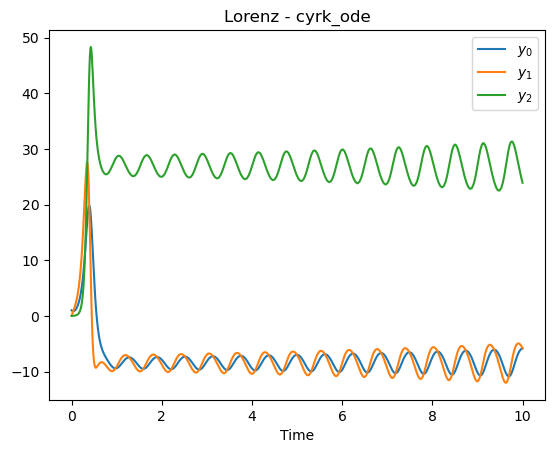

In [2]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans) in diffeqs.items():
            
    time_span = timespans[0]
    time_domain, y_results, success, message = cyrk_ode(cy_diffeq, time_span, y0, args_, rk_method=1)
    y_len = y_results.shape[0]
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(time_domain, np.real(y_results[i, :]), label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - cyrk_ode', xlabel='Time')
    ax.legend(loc='best')
    

## CyRK - nbrk_ode

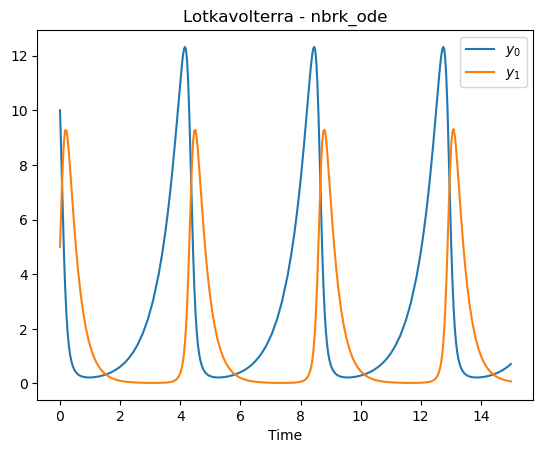

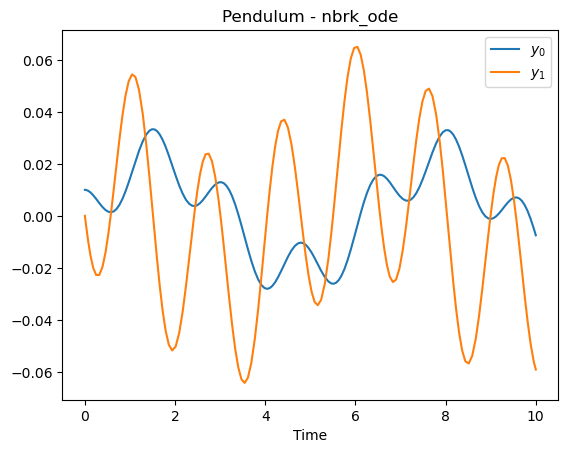

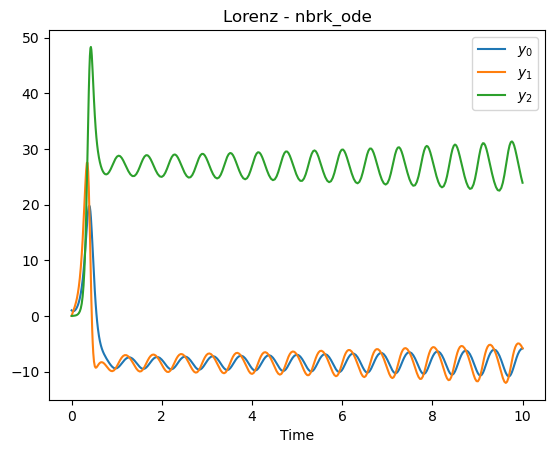

In [3]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans) in diffeqs.items():
    
    time_span = timespans[0]
    time_domain, y_results, success, message = nbrk_ode(nb_diffeq, time_span, y0, args_, rk_method=1)
    y_len = y_results.shape[0]
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(time_domain, np.real(y_results[i, :]), label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - nbrk_ode', xlabel='Time')
    ax.legend(loc='best')